# Understanding our Class Library
We'll be using the gwu_nn library to dive a bit deeper into how neural networks work and get a better handle on how we can manipulate our layers and activation functions to build better networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from gwu_nn.activation_layers import Sigmoid

## Setting up our Data
To explore how our GWU_Network library works we'll reuse the example data from the ML Crash Course. As the data is not linearly solvable, solving this problem will also show the flexibility of our network

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train[0].shape)
#x_train[0]

(28, 28)


5

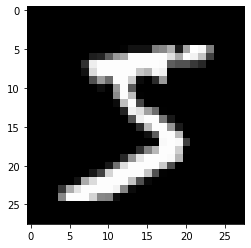

In [4]:
plt.imshow(x_train[0], cmap='gray')
y_train[0]

In [20]:
from tensorflow.keras.utils import to_categorical

# Reshaping the inputs
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
input_shape = x_train[0].shape
print(input_shape) # What is our input shape/shape of our image

# Turning the outputs into one-hot encoded representations
y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)

from numpy import argmax

# Depending on the format we may need argmax to interpret the results
print(y_train[0])
print(y_train_one[0])
print(argmax(y_train_one[0]))

(28, 28, 1)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [7]:
print(x_train.shape)
#print(x_train[0])
x_train[0].shape

(60000, 28, 28, 1)


(28, 28, 1)

In [8]:
print(y_train_one.shape)
print(y_train_one[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
inp = np.zeros((3,4,5))
out = np.zeros((2,1))
#np.ndarray(shape=(2,2,3))

output = inp.shape
output[1:]

(4, 5)

## The GWUNetwork Class
This class is the main structure used to house our network. Like many standard libraries, our GWUNetwork or neural network model works by adding layers to it.

```python
class GWUNetwork():

    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):

    def get_weights(self):

    #def set_loss(self, loss):
       
    def predict(self, input_data):
       
    def measure_loss(self, x, y):

    def fit(self, x_train, y_train, epochs):
```

So when we create a network it is initially empty, as it doesn't contain any layers

In [10]:
from gwu_nn.gwu_network import GWUNetwork
from gwu_nn.layers import Dense, Convolutional, Flatten

network = GWUNetwork()
network.add(Convolutional(num_kernels=2, kernel_size=3, activation='relu', input_size=x_train[0].shape))
network.add(Flatten())
network.add(Dense(8, activation='relu'))
network.add(Dense(10, activation='dummy')) #softmax

# Finally to complete our model we need to compile it. This final step defines our loss function, optimizer,
# learning_rate, and more (when working with larger libraries).

#network.compile(loss='mse', lr=0.1)
network.compile(loss='multiclass_cross_entropy', lr=0.001)
print(network)

(28, 28, 2)
(1, 1568)
8
Model:
Convolutional - (Input:(28, 28, 1), Output:(28, 28, 2))
Flatten - (Input:(28, 28, 2), Output:(1, 1568))
Dense - (Input:1568, Output:8)
Dense - (Input:8, Output:10)



### Sigmoid Activation Layer/Function

Notice that the sigmoid layer/function works nearly identical to the Dense layer, just here:
 - activation -> forward propogation
 - activation_partial_derivative -> backward propogation
 
``` python
class SigmoidActivation(ActivationFunction):

    @classmethod
    def activation(cls, x):
        return 1 / (1 + np.exp(-x))

    @classmethod
    def activation_partial_derivative(cls, x):
        return np.exp(-x) / (1 + np.exp(-x))**2
```

In [11]:
# Training model
sample = 50
x_train_sample = x_train[0:sample]
y_train_sample = y_train_one[0:sample]

network.fit(x_train_sample, y_train_sample, epochs=1, batch_size=1)

epoch 1/1   error=4.875902


In [12]:
y_train_one[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
ones = np.ones(shape=(1,10))
print(ones.shape)
ones = ones.reshape(-1)
print(ones.shape)

(1, 10)
(10,)


Here is a streamlined representation of our network

```python
network = GWUNetwork()
network.add(Dense(14, True, activation='relu', input_size=7))
network.add(Dense(1, True, activation='sigmoid'))
network.compile(loss='log_loss', lr=0.001)
network.fit(X_train, y_train, epochs=100, batch_size=20)
```

### Deeper Look at Training
```python
    def fit(self, x_train, y_train, batch_size, epochs):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j].reshape(1, -1)
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, self.learning_rate)

            # calculate average error on all samples
            if i % 10 == 0:
                err /= samples
                print('epoch %d/%d   error=%f' % (i + 1, epochs, err))
```

In [14]:
out = network.predict(x_test[:1])[0]
print(out)
epsilon = 1e-9
exps = np.exp(out - np.max(out))
softmax = exps / np.sum(exps)
y_pred = np.clip(softmax, epsilon, 1 - epsilon) # added clipping to prevent infinity 

print(softmax)
print(y_test[:1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7]


In [15]:
network.layers[0].kernels.shape

(3, 3, 2)

In [16]:
#network.layers[0].kernels
network.layers[3].weights

array([[ 7.15450336e-01, -5.49286946e-01, -4.29022991e-01,
        -3.28098626e-03, -1.46622488e-01, -2.85695632e-01,
        -1.37383743e-01, -3.96945022e-01, -9.32199197e-03,
        -3.30974126e-02],
       [ 2.11114304e-02,  1.63112475e-02,  7.80599176e-02,
         3.57888451e-01,  3.08470120e-01, -4.31228610e-03,
         9.96660562e-03,  8.45630585e-02, -3.82909751e-01,
        -3.90655401e-01],
       [ 9.96589526e-02,  3.17763522e-01, -1.23706804e-01,
         5.26503109e-02,  4.26822401e-02, -1.60992900e-02,
        -4.04890064e-01,  1.38673946e-01,  3.71474414e-01,
        -1.32917566e-01],
       [-4.07630616e-02, -4.27576001e-01, -6.62475460e-01,
        -2.66836435e-01,  2.50387617e-01,  2.40208006e-03,
        -2.34726121e-01, -4.10620167e-01, -1.88074506e-01,
         1.51477503e-01],
       [-4.06694337e-01, -3.23342124e-01, -6.96973812e+00,
        -9.32957716e-02, -3.38325761e+01, -8.71999252e-02,
         6.45378266e-02, -6.60417663e-02, -4.70648770e-01,
        -3.

In [17]:
train[0].reshape(1, -1).dot(network.layers[0].weights)

NameError: name 'train' is not defined

In [ ]:
d_round = lambda x: 1 if x >= 0.5 else 0
predictions = [d_round(x[0][0]) for x in network.predict(X_test[:10])]
actual = [y for y in y_test[:10].reshape(-1)]

print(predictions)
print(actual)

## In Class:
Determine the accuracy and loss of the model using our holdout testing dataset

In [ ]:
# Space for work - this matched with Joel's answer
raw_predictions = network.predict(x_test)
predictions = [d_round(x[0][0]) for x in raw_predictions]
actual = [y for y in y_test.reshape(-1)]
count = 0
for p,a in zip(predictions,actual):
    if p == a:
        count += 1
print("accuracy: " + str(100 * count/len(predictions)))

In [ ]:
# My answer (def wrong)
mse = 0
for a,r in zip(actual,raw_predictions):
    mse += (a-r)**2
mse /= len(raw_predictions)
print("loss: " + str(mse[0][0]))

In [ ]:
# Joel's answer
preds = np.array(network.predict(X_test)).reshape(-1,1)
network.loss(y_test, preds)